In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
import time
import warnings
import gc, sys
import statsmodels.api as sm
# warnings.filterwarnings('ignore')

In [224]:
# read the input data
raw_data = pd.read_csv('test.csv', low_memory=False)

In [242]:
df = raw_data
print("There are " + str(len(df)) + " observations in the dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")
nRow, nCol = df.shape

# display first rows in the dataset
df.head()

There are 195631 observations in the dataset.
There are 96 variables in the dataset.


,MUSTERI_ID,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...,KASIM,2,467,Öğretmen,103,1,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,100
1,7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...,KASIM,1,658,Öğretmen,106,1,54.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,111
2,47498c1c6161aea484b0eed7997846919ca9287684aee4...,KASIM,1,634,Serbest Meslek,106,1,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,127
3,48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...,KASIM,2,638,NaN,106,1,67.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,178
4,26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...,KASIM,1,80,Öğrenci,106,1,34.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,3


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195631 entries, 0 to 195630
Data columns (total 96 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MUSTERI_ID                  195631 non-null  object 
 1   FLAG                        195631 non-null  object 
 2   PP_CINSIYET                 195631 non-null  int64  
 3   PP_YAS                      195631 non-null  int64  
 4   PP_MESLEK                   169192 non-null  object 
 5   PP_MUSTERI_SEGMENTI         195631 non-null  int64  
 6   PP_UYRUK                    195631 non-null  int64  
 7   IL                          195630 non-null  float64
 8   SORU_YATIRIM_KARAKTERI_CVP  27387 non-null   object 
 9   SORU_YATIRIM_KARAKTERI_RG   27387 non-null   float64
 10  SORU_MEDENI_HAL_CVP         195631 non-null  object 
 11  SORU_MEDENI_HAL_RG          195315 non-null  float64
 12  SORU_EGITIM_CVP             168547 non-null  object 
 13  SORU_EGITIM_RG

In [244]:
columns_with_missing_values = df.columns[df.isna().sum() != 0]
df_with_missing_values = df[columns_with_missing_values]
isna_df = df_with_missing_values.isna().sum()

In [245]:
(isna_df.values / nRow)

array([1.35147293e-01, 5.11166431e-06, 8.60006850e-01, 8.60006850e-01,
       1.61528592e-03, 1.38444316e-01, 1.38444316e-01, 4.07394534e-01,
       4.07394534e-01, 5.80352807e-01, 5.80352807e-01, 9.98323374e-01,
       9.98323374e-01, 9.90190716e-01, 9.90190716e-01, 9.80851706e-01,
       9.80851706e-01])

In [246]:
# df = df[df['SORU_MEDENI_HAL_CVP'].isna() == False]
df.loc[df['SORU_MEDENI_HAL_CVP'].isna() == True, 'SORU_MEDENI_HAL_CVP'] = 'Single'

In [247]:
df = df.drop(['SON_AY_KATKI_MIKTARI'], axis=1)
df = df.drop(['SON_AY_KATKI_ADET'], axis=1)
df = df.drop(['SON_CEYREK_KATKI_MIKTARI'], axis=1)
df = df.drop(['SON_CEYREK_KATKI_ADET'], axis=1)

In [231]:
# kaldırılacak
columns_with_no_missing_values = df.columns[df.isna().sum() == 0]
df = df[columns_with_no_missing_values]

In [232]:
# vis_df = df['PP_MESLEK'].value_counts()

# fig = plt.figure(figsize=(15, 5))
# ax = sns.barplot(
#     x=vis_df.index[:10],
#     y=vis_df.values[:10],
#     color='cornflowerblue',
#     edgecolor='black'
# )
# fig.suptitle(' - ', fontsize=15)
# sns.despine()
# plt.show()

In [233]:
# df[df['SON_SENE_KATKI_ADET'].isna()].SON_SENE_KATKI_ADET

In [248]:
df = df.drop(['MUSTERI_ID'], axis=1)

In [ ]:
df.LABEL.unique()

In [249]:
cat_dtype = pd.CategoricalDtype(categories=['MAYIS', 'HAZIRAN', 'TEMMUZ','AGUSTOS','EYLUL', 'EKIM'], ordered=True)
df['FLAG'] = df['FLAG'].astype(cat_dtype)

In [250]:
cat_dtype = pd.CategoricalDtype(categories=[1, 2], ordered=False)
df['PP_CINSIYET'] = df['PP_CINSIYET'].astype(cat_dtype)

In [251]:
cat_dtype = pd.CategoricalDtype(categories=[105, 102, 104, 106, 103, 101], ordered=False)
df['PP_MUSTERI_SEGMENTI'] = df['PP_MUSTERI_SEGMENTI'].astype(cat_dtype)

In [252]:
cat_dtype = pd.CategoricalDtype(categories=[1, 2, 3], ordered=False)
df['PP_UYRUK'] = df['PP_UYRUK'].astype(cat_dtype)

In [253]:
city_counts = df['IL'].value_counts()
big_cities = city_counts[city_counts > 50_000].index
mid_cities = city_counts[(50_000 > city_counts) & (city_counts > 10_000)].index
small_cities = city_counts[10_000 > city_counts].index

df.loc[df['IL'].isin(big_cities), 'BUYUK_SEHIR'] = 0
df.loc[df['IL'].isin(mid_cities), 'BUYUK_SEHIR'] = 1
df.loc[df['IL'].isin(small_cities), 'BUYUK_SEHIR'] = 2

In [254]:
df = df.drop(['IL'], axis=1)

In [255]:
cat_dtype = pd.CategoricalDtype(categories=['Single', 'Married', 'Divorced', 'Widowed', 'Marriage Annulled',
       'Other', 'Marriage Cancelled'], ordered=False)
df['SORU_MEDENI_HAL_CVP'] = df['SORU_MEDENI_HAL_CVP'].astype(cat_dtype)

In [256]:
(df['SORU_MEDENI_HAL_RG'] > 250).sum()

12

In [257]:
df.loc[df['SORU_MEDENI_HAL_RG'] < 250, 'SORU_MEDENI_HAL_RG'] = 100

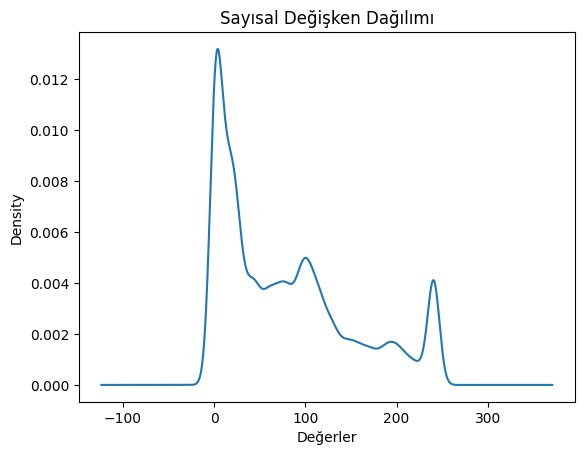

In [175]:
df['SORU_MEDENI_HAL_RG'].plot(kind='density')
plt.xlabel('Değerler')
plt.title('Sayısal Değişken Dağılımı')
plt.show()

In [258]:
df.columns

Index(['FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK', 'PP_MUSTERI_SEGMENTI',
       'PP_UYRUK', 'SORU_YATIRIM_KARAKTERI_CVP', 'SORU_YATIRIM_KARAKTERI_RG',
       'SORU_MEDENI_HAL_CVP', 'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP',
       'SORU_EGITIM_RG', 'SORU_GELIR_CVP', 'SORU_GELIR_RG',
       'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
       'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_SENE_KATKI_MIKTARI', 'SON_SENE_KATKI_ADET', 'ANAPARA', 'GETIRI',
       'BU01', 'BU02', 'BU03',

In [122]:
X = df.drop(columns=["LABEL"])
y = df["LABEL"]
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (850897, 80) y.shape= (850897,)


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (680717, 80) Y_train.shape= (680717,)
X_test.shape= (170180, 80) Y_test.shape= (170180,)


In [120]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder kullanarak kategorik verileri dönüştürme
label_encoder = LabelEncoder()
df.loc[:, 'FLAG'] = label_encoder.fit_transform(df['FLAG'])
df.loc[:, 'SORU_MEDENI_HAL_CVP'] = label_encoder.fit_transform(df['SORU_MEDENI_HAL_CVP'])

In [124]:
from sklearn.ensemble import RandomForestClassifier

# Rastgele Orman Sınıflandırıcı modelini tanımla
sklearn_rf = RandomForestClassifier(n_estimators=100, max_depth=32, random_state=35)

# Eğitim zamanını ölç
t0 = time.time()
sklearn_rf.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s): {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s): 143.16789


In [134]:
from sklearn.metrics import f1_score

sklearn_pred = sklearn_rf.predict(X_test)

# evaluate mean squared error on the test dataset
sklearn_mse = f1_score(y_test, sklearn_pred, average='weighted')
print('[Scikit-Learn] f1 score : {0:.3f}'.format(sklearn_mse))

[Scikit-Learn] f1 score : 0.969


In [182]:
from sklearn.ensemble import RandomForestClassifier

# Rastgele Orman Sınıflandırıcı modelini tanımla
final_model = RandomForestClassifier(n_estimators=100, max_depth=32, random_state=35)

# Eğitim zamanını ölç
t0 = time.time()
final_model.fit(X, y)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s): {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s): 188.50445


In [184]:
final_model

RandomForestClassifier(max_depth=32, random_state=35)

In [259]:
X_f = df

In [271]:
from sklearn.metrics import f1_score

_pred = final_model.predict(X_f)

In [270]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder kullanarak kategorik verileri dönüştürme
label_encoder = LabelEncoder()
X_f.loc[:, 'FLAG'] = label_encoder.fit_transform(X_f['FLAG'])
X_f.loc[:, 'SORU_MEDENI_HAL_CVP'] = label_encoder.fit_transform(X_f['SORU_MEDENI_HAL_CVP'])

In [272]:
output = pd.DataFrame({'MUSTERI_ID': raw_data.MUSTERI_ID, 'LABEL': _pred})
output.to_csv('submission_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
